In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size = 0.25,random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)#get the mu and sigma values
X_test = sc_X.transform(X_test)#apply the same

In [15]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
import warnings
warnings.filterwarnings("ignore")

plt.ion()

F:\machinelearning\anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [24]:
cm

array([[173,  13],
       [ 48,  66]], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

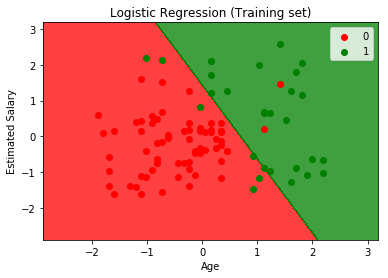

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
#this gives the limits for the graph we add -1 and +1 to prevent overcorwding
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1 ,stop = X_set[:, 0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:, 0].min() -1 ,stop = X_set[:, 0].max() + 1,step = 0.01))
#gives colour and makes the graph
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plots the dots in the graphs
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

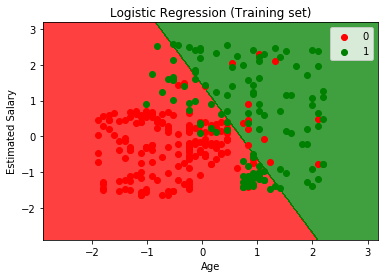

In [26]:
X_set, y_set = X_test, Y_test
#this gives the limits for the graph we add -1 and +1 to prevent overcorwding
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1 ,stop = X_set[:, 0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:, 0].min() -1 ,stop = X_set[:, 0].max() + 1,step = 0.01))
#gives colour and makes the graph
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plots the dots in the graphs
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()